In [1]:
import typing as t

import numpy as np

from pythonpractice import apps
from pythonpractice import REPO_ROOT
from pythonpractice import plotting as pl

In [2]:
import plotly.io as pio

pio.renderers.default = "browser"

# The Problem

Our friend Roberto owns a cozy little pizzeria in Berlin. Every day at noon, he checks
the number of reserved seats and decides how much pizza dough to prepare for dinner. Too
much dough, and it goes wasted; too little, and he runs out of pizzas. In either case,
he loses money.

It’s not always easy to gauge the number of pizzas from the reservations. Many customers
don’t reserve a table, or they eat something other than pizza. Roberto knows that there
is some kind of link between those numbers, in that more reservations generally mean
more pizzas—but other than that, he’s not sure what the exact relation is.

We can fit a machine learning model to try and predict the number of pizzas. We will use
Supervised Learning to solve this problem.

Here's how the first few lines of the data collected:

```text filename="pizza.txt"
Reservations  Pizzas
13            33
2             16
14            32
23            51
```

This data is stored in the file `pizza.txt`.


Write a function that takes in the path to the `pizza.txt` file and returns two numpy
arrays, one for the `Reservations` column and one for the `Pizzas` column.

Note: Check which one is a better way to read a txt file, through pandas or numpy

In [3]:
import pandas as pd
def load_pizza_data(path: str) -> tuple[np.ndarray, np.ndarray]:
    # Read text file into a dataframe
    # Hint: Numpy has a function to read text files: `np.loadtxt`
    c = np.loadtxt(path, skiprows=1, unpack=True)
    reservations = c[0]
    pizzas = c[1]
    return reservations, pizzas

In [4]:
reservations, pizzas = load_pizza_data(str(REPO_ROOT / "data" / "pizza.txt"))

Uncomment the following cell and run it to ensure that your function is working correctly.

In [5]:
assert reservations.shape == pizzas.shape == (30,)

In [6]:
pl.scatter_plot_with_regression_line(
    reservations,
    pizzas,
    title="Pizza",
    x_label="Reservations",
    y_label="Pizzas",
)

Uncomment the above code and run the cell to plot the data. You should see a scatter plot
along with a line of best fit. The line of best fit is going to be our estimate of the
relationship between the number of reservations and the number of pizzas.

We will now build our own linear regression model to predict the number of pizzas
given the number of reservations from scratch.

# Linear Regression in 1D

What is the equation of a line in coordinate space? It's $y = mx + b$, where $m$ is the
slope of the line and $b$ is the y-intercept. We can use this equation to predict the
number of pizzas given the number of reservations.

Write a function that takes in the slope, $m$, the y-intercept, $b$, and the number of
reservations, $x$, and returns the predicted number of pizzas, $y$.

In [7]:
def predict(
    reservations: int | np.ndarray, slope: float, intercept: float
) -> float | np.ndarray:
    # take in the slope and intercept and return the predicted number of pizzas
    y = slope * reservations + intercept # y = mx + b
    return y

We're calling the function `predict` because once we have a slope and y-intercept, we
can use them to predict the number of pizzas for any number of reservations.

In [8]:
assert isinstance(predict(10, 0.5, 1), float)
assert isinstance(predict(reservations, 0.5, 1), np.ndarray)

## Guess and Check

How do we find the best values for $m$ and $b$? We can try different values and see. We
can start by guessing that $m = 1$ and $b = 0$. We can then use our `predict` function
to predict the number of pizzas for each number of reservations. We can then compare
these predictions to the actual number of pizzas and see how well we did.

Btw, $m$ and $b$ are called the **parameters** of the model. We can think of the
parameters as knobs that we can turn to change the output of the model. We can use
these knobs to make the model better.

Say, you have two sets of parameters, $m_1$ and $b_1$, and $m_2$ and $b_2$. How do you
know which set of parameters is better? This is where the **loss function** comes in.

### Loss Function

The loss function measures how well our model is doing. It takes in the actual number
of pizzas and the predicted number of pizzas and returns a number that tells us how
bad our model is doing. The lower the number, the better our model is doing.

Try to write a function that takes in the actual number of pizzas and the predicted
number of pizzas and returns the loss.

In [9]:
def a_loss_function(y_pred: np.ndarray | float, y_true: np.ndarray | float) -> np.ndarray | float:
    """A loss function that gives you a measure of how well a model performed based on
    it's predictions.

    Args:
        y: The true values
        y_hat: The predicted values

    Returns:
        A float that represents the loss
    """
    diff = y_pred - y_true
    return np.mean(diff)

assert isinstance(a_loss_function(np.ones(2), np.zeros(2)), float)

### Questions

1. What is the loss for $m = 1$, $b = 0$ and the first data point?\
<span style="color:orange">20.0</span>
2. Why does the loss function return a float?\
<span style="color:orange">The loss function is basically numpy array of predicted number of pizzas and actual number of pizzas. This will result in the number of loss values equal to the length of numpy array, leaving us with multiple loss values to compare. </span>
3. What are some other loss functions that you can think of?
4. What properties should a loss function have?


Scratch cell space

In [10]:
y_hat = predict(reservations = reservations[0], slope = 1, intercept = 0)
res = a_loss_function(y_pred = pizzas[0],y_true=y_hat)

In [11]:
res

20.0

### Mean Squared Error

The loss function that is typically used for linear regression, and many other machine
learning models, is the **mean squared error**. It is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $n$ is the number of data points, $y_i$ is the actual number of pizzas, and
$\hat{y}_i$ is the predicted number of pizzas.

### Questions

1. What is the loss for $m = 1$, $b = 0$ and the first data point?
2. Why is the mean squared error a good loss function for linear regression?

Write a function that takes in the actual number of pizzas and the predicted number of
pizzas and returns the mean squared error.

In [12]:
def mean_squared_error(y_pred: np.ndarray, y_true: np.ndarray) -> float:
    mse = ((y_true - y_pred) **2 ).mean()
    return mse

The next cell will plot the data and the line of fit for the chosen values of the
parameters. It also contains sliders that you can use to change the values of the
parameters and see how the line of fit changes. You can also see the loss for the
chosen values of the parameters. Play around with the sliders and see how the line of
fit changes. 

### Questions

1. How does the loss function change as the line changes?
2. Can you find a combination of parameters that gives you a loss of 0?
3. Is it even possible for the linear regression model to get a loss of 0 on this dataset?

In [13]:
apps.visualize_parameter_changes_app(
    x=reservations,
    y=pizzas,
    model=predict,  # type: ignore
    parameter_ranges={
        "slope": apps.ParameterRange(-10, 10),
        "intercept": apps.ParameterRange(-10, 10),
    },
    loss_fn=mean_squared_error,
).run_server(debug=True, mode="external")

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


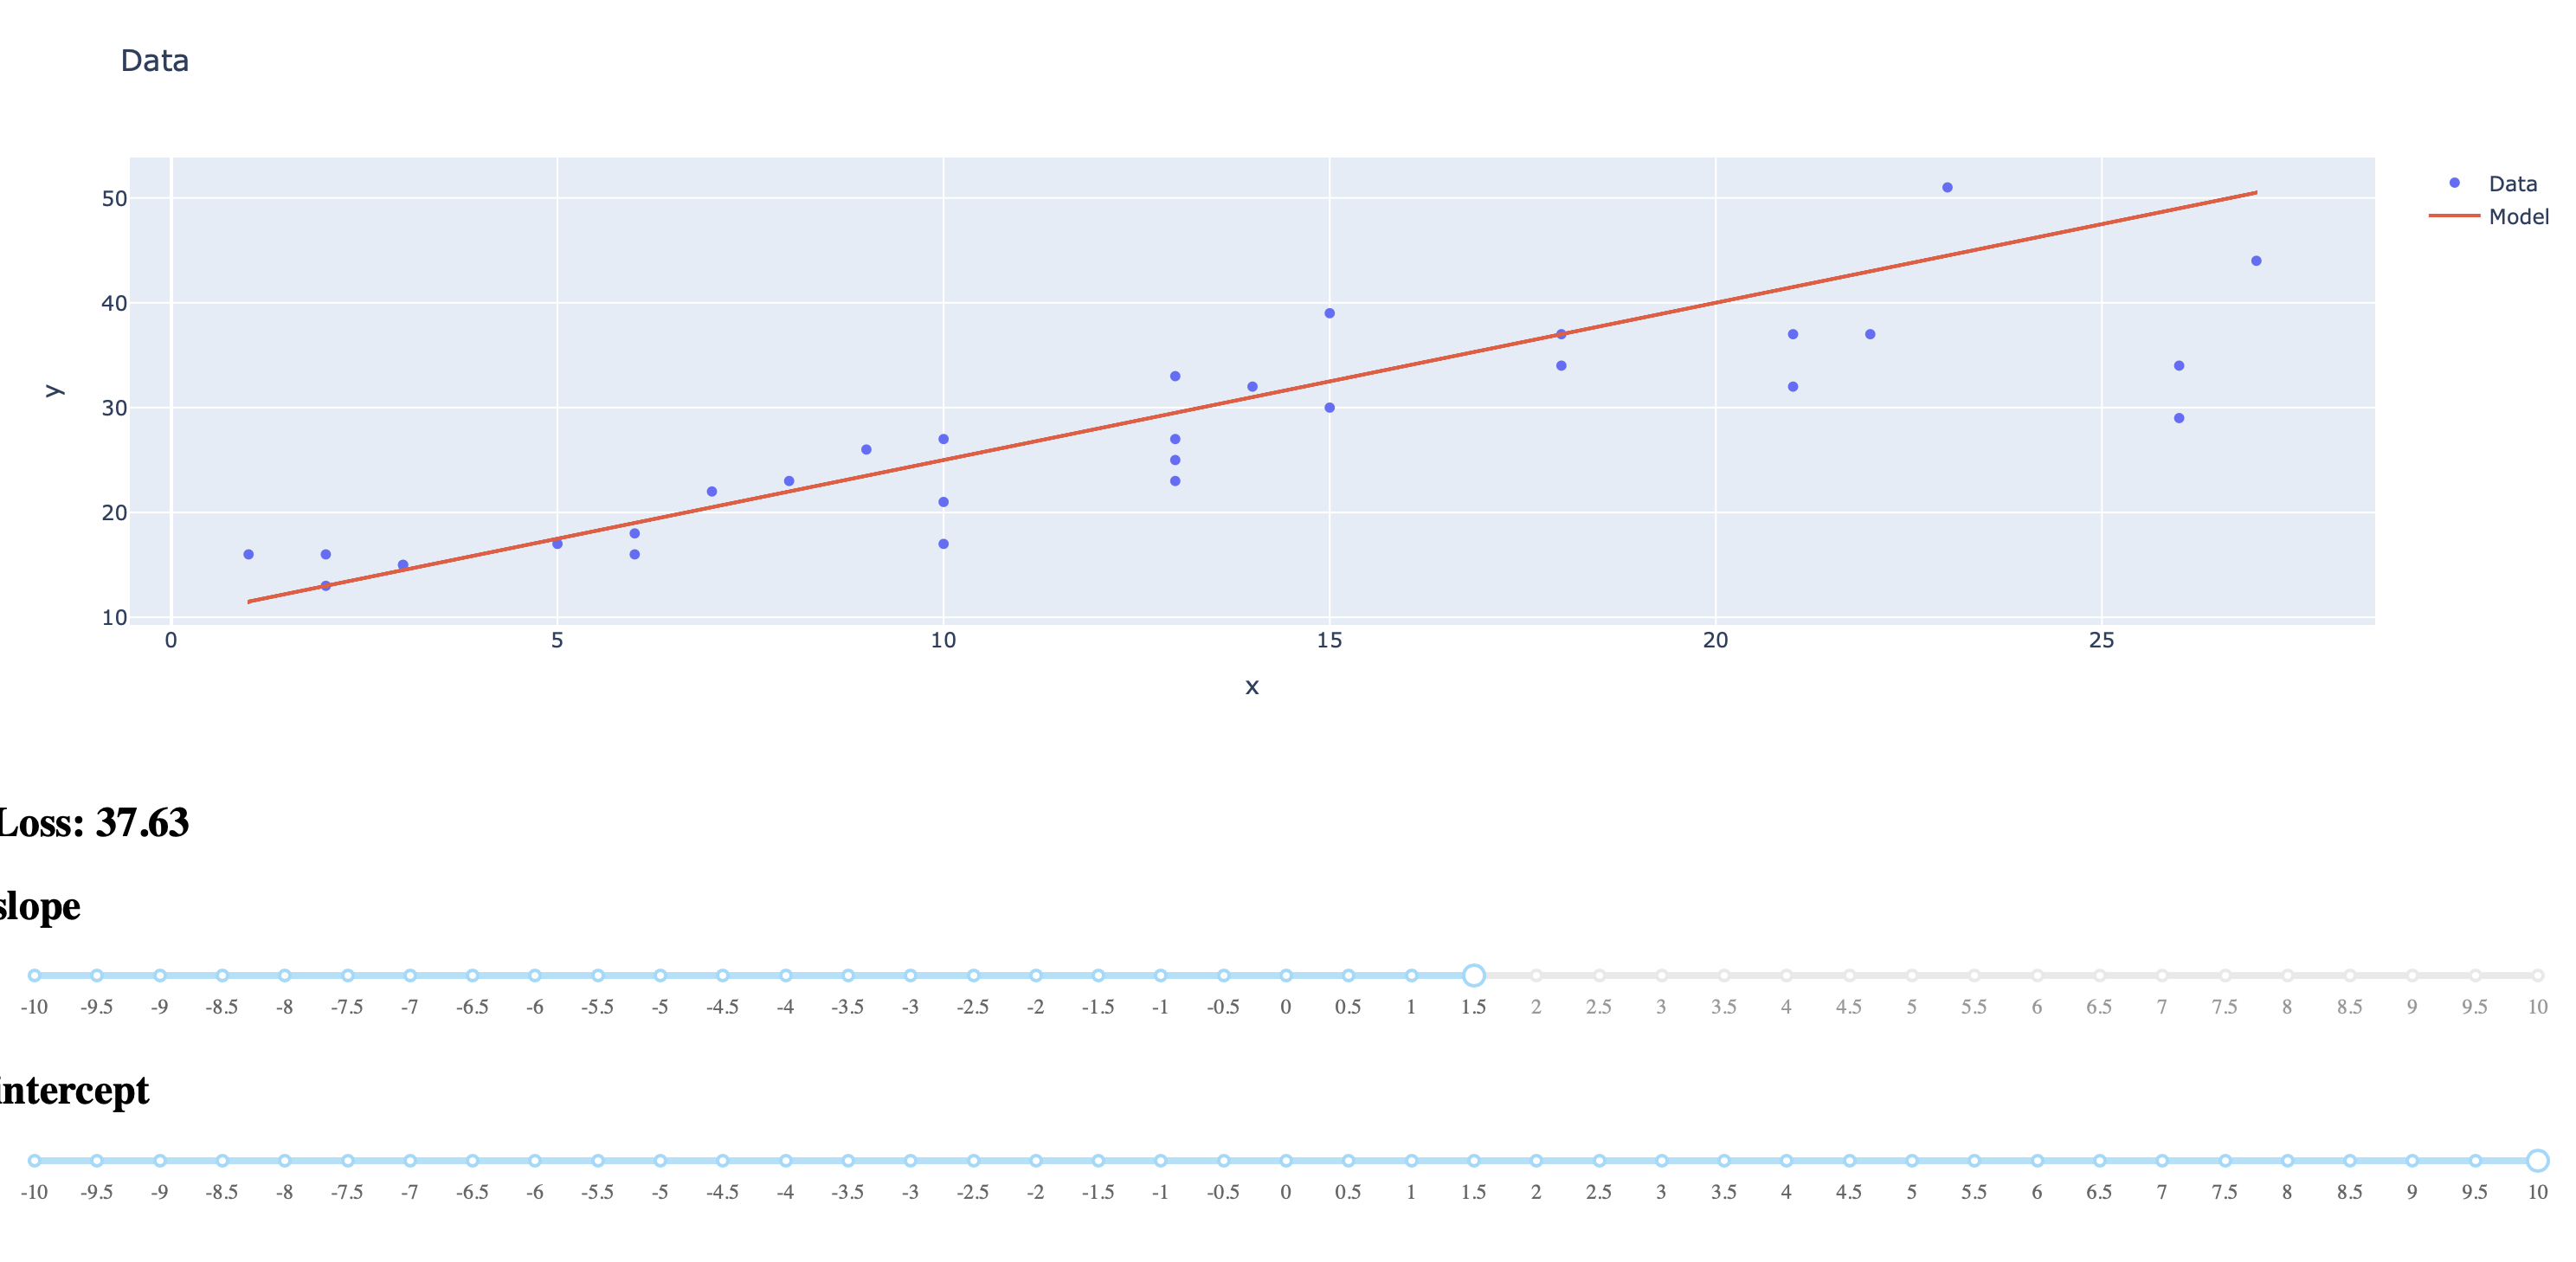

In the following cell, write the code to display the app for your loss function (i.e.
`a_loss_function`).

In [14]:
apps.visualize_parameter_changes_app(
    x=reservations,
    y=pizzas,
    model=predict,  # type: ignore
    parameter_ranges={
        "slope": apps.ParameterRange(-10, 10),
        "intercept": apps.ParameterRange(-10, 10),
    },
    loss_fn=a_loss_function,
).run_server(debug=True, mode="external", port=9999)

Dash is running on http://127.0.0.1:9999/

Dash app running on http://127.0.0.1:9999/


Looks like my loss function wasn't a good fit


### Questions
1. How does your loss function change as the line changes?
2. Is it as good as the mean squared error? Why or why not?

Play around with different loss functions and see how they change as the line changes.
All you need to do is define a new function with the same signature as `a_loss_function`
and pass it in to the `tweak_model_parameters_app` function.

As the fit becomes better, the loss function decreases.


### Linear regression in higher dimensions

The pizza problem that we're trying to solve above is a linear regression problem in 1
dimension. This is because we have a single input variable, the number of reservations,
and a single output variable, the number of pizzas. Such a problem can be visualized
in a 1D coordinate space and is called a **`Simple Linear Regression`** problem.

What if we have more than one input variable? For example, what if we also have the
number of customers who walk in without a reservation? We can then use the number of
reservations and the number of walk-ins to predict the number of pizzas. This is called
a **`Multiple Linear Regression`** problem.

The inputs are called **`features`** and the output are called the **`targets`** or **`labels`**.

Let's say we have two features, $x_1$ and $x_2$, and one target, $y$. The equation of a
plane in 3D space is $z = mx_1 + nx_2 + b$. We can use this equation to predict the
number of pizzas given the number of reservations and the number of walk-ins. Again, the
parameters of the model are the $m$, $n$, and $b$.Typically, the slopes, $m$ and $n$,
are called the **`weights`** of the model and the y-intercept, $b$, is called the
**`bias`**.

Write a function that takes in the weights, $m$ and $n$, the bias, $b$, and the
features, $x_1$ and $x_2$, and returns the predicted target, $y$.

In [15]:
def predict(
    x1: float | np.ndarray, x2: float | np.ndarray, m: float, n: float, b: float
) -> float | np.ndarray:
    y = (m * x1) + (n * x2) + b
    return y

What is the equation for `k` features?

Write a function that takes in an arbitrary number of features, corresponding number of
weights, and the bias and returns the predicted target.

In [16]:
def predict(
    x: np.ndarray, weights: list[float] | np.ndarray, b: float
) -> float | np.ndarray:
    # Note 1: x is now 2D with shape (n, k) where n is the number of samples and k is
    #         the number of features. Check that this is indeed the case.
    # Note 2: Check that the number of weights is equal to the number of features
    y = 0
    for i in range(k):
       y +=  x[i] * w[i]
    return y + b

### Matrix notation

We can represent the equation for `k` features as:

$$
y = \sum_{i=1}^{k} w_i x_i + b
$$

where $w_i$ is the weight for the $i^{th}$ feature and $x_i$ is the value of the
$i^{th}$ feature.

We can also represent this equation as:

$$
y = w^T x + b
$$

where $w$ is a vector of weights and $x$ is a vector of features. The $w^T$ is the
transpose of the vector $w$.

Write a function that takes in a vector of weights, a vector of features, and the bias
and returns the predicted target.

In [17]:
def predict(x: np.ndarray, weights: np.ndarray, b: float) -> np.ndarray:
    # Replace with your code
    # Note 1: The shape of matrix x is (n, k) where n is the number of samples and k is
    #         the number of features
    # Note 2: Check that the number of weights is equal to the number of features
    y = np.matmul(x,w) + b
    return y

## Mathematical solution

Since it's difficult to visualize a problem in more than 3 dimensions, we will go back
to simple linear regression to explain further concepts. We will solve the multiple
linear regression version too, but we won't be able to visualize it.

We can also find the best values for $m$ and $b$ mathematically. We can do this by
minimizing the loss function. The best values for $m$ and $b$ are the values that
minimize the loss function. We can use calculus to find the values that minimize the
loss function.

The equation for the best values of $m$ and $b$ is:

$$
\begin{align}
\frac{\partial}{\partial m} \text{MSE} &= 0 \\
\frac{\partial}{\partial b} \text{MSE} &= 0
\end{align}
$$

where $\frac{\partial}{\partial m}$ and $\frac{\partial}{\partial b}$ are the partial
derivatives of the loss function with respect to $m$ and $b$ respectively.

Solving the above equations gives us:

$$
\begin{align}
m = \frac{\sum{y}\sum{x^2} - \sum{x}\sum{xy}}{n\sum{x^2} - \sum{x}^2} \\
b = \frac{n\sum{xy} - \sum{x}\sum{y}}{n\sum{x^2} - \sum{x}^2}
\end{align}
$$

where $n$ is the number of data points, $x$ is the input variable, $y$ is the output
variable, and $\sum{x^2}$ is the sum of the squares of the input variable.

Write a function that takes in the features and the targets and returns the best values
for $m$ and $b$ using the above equations.

In [18]:
def solve(x: np.ndarray, y: np.ndarray) -> tuple[float, float]:
    n = len(x)
    m = ((y.sum() * (x ** 2).sum()) - x.sum() * (x * y).sum())/((n * (x ** 2).sum()) - (x ** 2).sum())
    b = ((n * (x*y).sum()) - (x.sum() * y.sum()))/((n * (x ** 2).sum()) - (x ** 2).sum())
    return m,b

Check your function by comparing the values of $m$ and $b$ that you get with the expected
values. Run the following cell. If your function is correct, the cell will print `Solved`.

In [19]:
# m, b = solve(reservations, pizzas)
# loss = mean_squared_error(m * reservations + b, pizzas)
# print(f"Slope: {m:.2f}, Intercept: {b:.2f}, Loss: {loss:.2f}")
# assert np.allclose([m, b], [1.081111957349581, 13.172581873571973]), (m, b)
# print("Solved")

What values did you get for $m$ and $b$? Are they close to the values that you got
using the slider app?

### Multiple linear regression

We can also solve the multiple linear regression problem mathematically. The equation
for the best values of $w$ and $b$ is:

$$
\begin{align}
\frac{\partial}{\partial w} \text{MSE} &= 0 \\
\frac{\partial}{\partial b} \text{MSE} &= 0
\end{align}
$$

where $\frac{\partial}{\partial w}$ and $\frac{\partial}{\partial b}$ are the partial
derivatives of the loss function with respect to $w$ and $b$ respectively.

Solving the above equations gives us:

$$
\begin{align}
w = (X^T X)^{-1} X^T y \\
b = \bar{y} - w^T \bar{x}
\end{align}
$$

where $X$ is the matrix of features, $y$ is the vector of targets, $\bar{x}$ is the
mean of the features, $\bar{y}$ is the mean of the targets, and $w$ is the vector of
weights.

Write a function that takes in the features and the targets and returns the best values
for $w$ and $b$ using the above equations.

In [20]:
def solve_mlr(x: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, float]:
    # Replace with your code
    # Note 1: The input x is a 2D array with shape (n, k), where n is the number of data
    #         points and k is the number of features.
    # Note 2: What should the shape of the weights be?
    return np.zeros(()), 0

Run the following cell to test your function. If your function is correct, the cell
will print `Solved`.

In [21]:
# from sklearn import datasets

# X, y_pred = datasets.load_diabetes(return_X_y=True)
# assert isinstance(X, np.ndarray)
# assert isinstance(y_pred, np.ndarray)
# w, b = solve_mlr(X, y_pred)
# assert np.isclose(mean_squared_error(predict(X, w, b), y_pred), 2859.69634758675)
# print("Solved")

## Gradient descent

It turns out that solving the linear regression problem mathematically doesn't work
well in practice. Our datasets had sizes of 30, and 442. In practice, we will have
datasets with millions of data points. Solving the linear regression problem
mathematically is computationally expensive. Finding the inverse of a matrix is
expensive, and not numerically stable. We can use a technique called **Gradient Descent**
to find the best values for the weights and bias.

### Gradient descent in 1D

Let's start with the simple linear regression problem. We can visualize the loss
function as a curve. The best values for $m$ and $b$ are the values that minimize the
loss function. We can use gradient descent to find the values that minimize the loss
function.

#### The algorithm

The algorithm for gradient descent is:

1. Initialize the weights and bias randomly.
2. Calculate the predicted targets, $\hat{y}$, using the current weights and bias.
3. Calculate the loss, $L$, using the predicted targets and the actual targets.
4. Calculate the gradient of the loss with respect to the weights and bias.
5. Update the weights and bias using the gradients.
6. Repeat steps 2-5 until the loss is small enough.

#### Calculating the gradients

In practice, we don't calculate the gradients directly. We will

a. Use a library that implements the Linear Regression model for us, or\
b. Use a library that automatically calculates the gradients for us.

We will use the second option. We will use the `torch` library to automatically
calculate the gradients for us.


##### `PyTorch` primer

A full overview of PyTorch is outside the scope of this tutorial. You can read the
`PyTorch` documentation [here](https://pytorch.org/docs/stable/index.html).

PyTorch is a library for automatic differentiation. It can calculate the gradients of
functions etc. It has an API that is slightly different from numpy. It can also run on
GPUs and TPUs.

We will use a `torch.Tensor` in place of a `numpy.ndarray`. This in combination with
`torch.func` will allow us to use the `torch` library to automatically calculate the
gradients. We will redefine the above functions using `torch.Tensor`.

Rewrite the `predict` function using `torch.Tensor`.

In [22]:
import torch


def predict(x: torch.Tensor, weights: torch.Tensor, b: torch.Tensor) -> torch.Tensor:
    # Replace with your code
    # Note 1: The shape of x is (n, k) where n is the number of samples and k is
    #         the number of features
    # Note 2: Check that the number of weights is equal to the number of features
    if x.ndim == 1:
        return weights * x + b
    y = torch.matmul(x,weights) + b
    return y

Rewrite the `mean_squared_error` function using `torch.Tensor`.

In [23]:
def mean_squared_error(
    weights: torch.Tensor, bias: torch.Tensor, x: torch.Tensor, y_true: torch.Tensor
) -> torch.Tensor:
    # Replace with your code
    # Note 1: We're passing in the parameters as a tuple, so you'll need to unpack them
    # Note 2: The shape of x is (n, k) where n is the number of samples and k is
    #        the number of features
    y_pred = predict(x,weights,bias)
    mse_tensor = ((y_true - y_pred) **2 ).mean()
    return mse_tensor

Now that we have the loss function defined, we can use the `torch.func.grad` function to
calculate the gradients. The `grad` function takes in a function and returns
a function that calculates the gradients of the input function. We will use the
`grad` function to calculate the gradients of the `mean_squared_error` function.

The `torch.grad_and_value` function is similar to the `torch.grad` function. It takes
in a function and returns a function that calculates the gradients and the value of the
input function. We will use the `grad_and_value` function to calculate the gradients
and the value of the `mean_squared_error` function.

In [24]:
import torch.func as ft

grad_fn = ft.grad_and_value(mean_squared_error, argnums=(0, 1))  

Here, `grad_fn` is being dynamically constructed by PyTorch for us, based on the definition of `mean_squared_error`.
You can think that the `grad_fn` is defined as follows:

```python
def grad_fn(
    weights: torch.Tensor, bias: torch.Tensor, x: torch.Tensor, y_true: torch.Tensor
) -> tuple[tuple[torch.Tensor, torch.Tensor], torch.Tensor]:
    ...
```

When you call `grad_fn`, PyTorch will automatically call `mean_squared_error` with the appropriate inputs, calculate
the loss, calculate the gradient of that loss wrt. the parameters, and return the gradients and the loss to us. 

In [25]:
(grad_weights, grad_bias), loss = grad_fn(
    torch.randn(10), torch.randn(()), torch.randn(10, 10), torch.randn(10)
)
assert grad_weights.shape == (10,)
assert grad_bias.shape == ()
assert loss.shape == ()

#### Updating the weights and bias

Let us now focus on step 5 of the algorithm. We will use the gradients to update the
weights and bias. We will use the following equation to update the weights and bias:

$$
\begin{align}
w &= w - \alpha \frac{\partial L}{\partial w} \\
b &= b - \alpha \frac{\partial L}{\partial b}
\end{align}
$$

where $\alpha$ is the learning rate.

#### Questions

1. Why do we subtract the gradients from the weights and bias instead of adding them?
2. What is the role of the learning rate in gradient descent?

Write a function that takes in the gradients of the loss with respect to the weights
and bias and updates the weights and bias.

In [26]:
def update_parameter(
    param: torch.Tensor, grad: torch.Tensor, lr: float
) -> torch.Tensor:
    param = param - grad * lr
    return param

#### The training loop

We are now ready to implement the training loop. The training loop will repeat the
following steps until the loss is small enough:

1. Calculate the predicted targets, $\hat{y}$, using the current weights and bias.
2. Calculate the loss, $L$, using the predicted targets and the actual targets.
3. Calculate the gradients of the loss with respect to the weights and bias.
4. Update the weights and bias using the gradients.

Bear in mind that steps 1, 2, 3 are automatically done for us by the `grad_fn` we created above.
So in effect, the `train_step` function just calls `grad_fn`, uses the returned gradients
to update the parameters and returns the loss and updated parameters. 

Write a function that implements the training loop.

In [27]:
def train_step(
    params: tuple[torch.Tensor, torch.Tensor],
    x: torch.Tensor,
    y: torch.Tensor,
    lr: float,
) -> tuple[float, tuple[torch.Tensor, torch.Tensor]]:
    """Performs a single step of gradient descent.

    Args:
        params: The parameters of the model - a tuple of (weights, bias)
        x: The input data
        y: The true values
        lr: The learning rate

    Returns:
        A tuple of the loss and the updated parameters
    """
    # Replace with your code
    # Note 1: We're passing in the parameters as a tuple, so you'll need to unpack them
    # Note 2: The shape of x is (n, k) where n is the number of samples and k is
    #         the number of features
    # Note 3: You'll need to use the update_parameter function and the grad_fn defined above
    # Note 4: This method only implements a single step of gradient descent.
    w,b = params
    #calling grad function to find the gradient loss for weights and the gradient loss for bias, and the loss function
    (grad_weights, grad_bias), loss = grad_fn(
        w,b,x,y
    )
    #update the weights and bias
    updated_weights = update_parameter(w,grad_weights,lr)
    updated_bias = update_parameter(b,grad_bias,lr)
    return loss , (updated_weights, updated_bias)

Now that we have all the pieces of the puzzle, we can train a model to predict the
diabetes progression from the 10 baseline variables.

In [28]:
import wandb
from tqdm import tqdm


def solve_gd(
    features: np.ndarray, targets: np.ndarray, num_epochs=1000, learning_rate=0.001
) -> tuple[torch.Tensor, torch.Tensor]:
    """Solves the linear regression problem using gradient descent.

    Args:
        features: A 2D array of shape (num_examples, num_features).
        targets: A 1D array of shape (num_examples,).
        num_epochs: The number of epochs to train for.
        learning_rate: The learning rate.

    Returns:
        The weights and bias.
    """
    # Setup experiment tracking with WandB.
    wandb.init(project="linear-regression")
    # Initialize the weights and bias.
    # Note: We're using a normal distribution here, but you could use any initialization
    #       method you like.
    # Note: The seed is used to ensure that the results are reproducible. You can
    #       change the value of the seed to see how it affects the results.
    seed = 0
    torch.manual_seed(seed)
    weights = torch.randn(features.shape[1] if features.ndim == 2 else 1)
    bias = torch.randn(())
    features_ = torch.from_numpy(features).float()
    targets_ = torch.from_numpy(targets).float()

    # Train the model.
    # Setup a progress bar to display the training progress.
    pbar = tqdm(total=num_epochs)
    for _ in range(num_epochs):
        loss, (weights, bias) = train_step(
            (weights, bias), features_, targets_, lr=learning_rate
        )
        # Log the loss and parameters to WandB.
        if weights.ndim == 1 and len(weights) > 1:
            logged_weights = wandb.Histogram(weights.detach().cpu().numpy())
        else:
            logged_weights = weights.detach().cpu().item()
        wandb.log(
            {
                "training/loss": loss,
                "parameters/weights": logged_weights,
                "parameters/bias": bias,
            }
        )
        # Update the progress bar.
        pbar.set_description(f"Loss: {loss:.2f}")
        pbar.update(1)

    # Clean up the progress bar.
    pbar.close()
    # Finish the experiment so that next run is not logged to the same experiment data.
    wandb.finish()

    # Return the best
    return weights, bias

In [33]:
w, b = solve_gd(reservations, pizzas, num_epochs=8000, learning_rate=0.0005)
print(w,b)
loss = mean_squared_error(
    w, b, torch.from_numpy(reservations).float(), torch.from_numpy(pizzas).float()
).item()
assert 22 <= loss <= 24
print("Solved")

Loss: 23.53: 100%|██████████| 8000/8000 [00:09<00:00, 837.16it/s]


parameters/bias,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇████████
parameters/weights,██▇▇▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
training/loss,█▇▇▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
parameters/bias,11.56941
parameters/weights,1.17404
training/loss,23.52859


tensor([1.1740]) tensor(11.5694)
Solved


In [30]:
import numpy as np
from sklearn import datasets

X, y_pred = datasets.load_diabetes(return_X_y=True)
assert isinstance(X, np.ndarray)
assert isinstance(y_pred, np.ndarray)
w, b = solve_gd(X, y_pred, num_epochs=3000)
loss = mean_squared_error(
    w,
    b,
    torch.as_tensor(X, dtype=torch.float32),
    torch.as_tensor(y_pred, dtype=torch.float32),
).item()
assert w.shape == (10,)
print("Solved")

Loss: 5716.83: 100%|██████████| 3000/3000 [00:03<00:00, 816.89it/s]


parameters/bias,▁▂▃▄▄▅▅▆▆▆▆▇▇▇▇▇▇▇██████████████████████
training/loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
parameters/bias,151.75719
training/loss,5716.8335


Solved


Let's get a better understanding of the effect of the learning rate on the training.
The next cell creates an app that allows you to vary the learning rate and see how
the training changes. 

In [32]:
print(f"weights = {w}")

weights = tensor([ 5.5267,  0.5523, 10.5062, 10.0764,  3.4165,  2.2688, -8.0833, 10.0522,
        11.4751,  7.7994])
